<a href="https://colab.research.google.com/github/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has been adapted from NYU's Deep Learning Course taught by Yann LeCun & Alfredo Canziani. \[ [Website](https://atcold.github.io/pytorch-Deep-Learning/) ]

# Outline
1. Introduction about Pytorch. How does the Computation happen? How can gradients be computed? **[Lab 1A](https://github.com/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_1A.ipynb)**
2. Simple Regression and Classification **[Lab 1B](https://github.com/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_1B.ipynb)**


## Introduction

A large part of the course will require understanding of how gradient based computation works. In particular, how models can be learnt through gradients. 

Apart from the initial few lectures on Deep Learning, computing gradients manually for learning will become more and more hard especially with newer modules such as Convolution, etc., being introduced.

Given the scenario, we sought the use of Differentiable Computing Frameworks (PyTorch). These frameworks utilize computation graphs which are essentially directed acyclic graphs representing operations and variables. 

Lets suppose we were to do the following computation as part of our learning model:

$$ p = x + y $$
$$ g = p \times z $$

A simplistic representation of the computation graph would look like:

<p align="center">
<img src="https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg">
</p>

Here, the edges represent Tensors and nodes represent Operations.

Lets code this up in PyTorch!

In [1]:
# Install a visualization software
!pip install torchviz

## Forward Pass

In [2]:
import torch

x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([3.], requires_grad=True)
z = torch.tensor([4.], requires_grad=True)

p = x + y
g = p * z

We can check the values of p and g just to be sure. They should be 5 and 20 respectively.

In [3]:
print(f"p: {p}")
print(f"g: {g}")

p: tensor([5.], grad_fn=<AddBackward0>)
g: tensor([20.], grad_fn=<MulBackward0>)


Lets visualize the computation graph once to be sure. We will use `torchviz` for this.

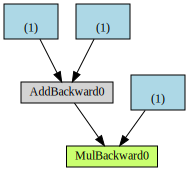

In [4]:
from torchviz import make_dot
make_dot(g)

## Gradients

In gradient based learning, what we've done till now is considered as a forward pass. The learning part is usually during the backward pass. So what is the backward pass?

The Backward pass is essentially where we compute gradients and update our parameters of the model based on those gradients, so that the output is a step closer to where its supposed to be. In this notebook, we will be concerned only with inspecting the value of the gradients rather than updating them.

To compute the gradients, we can call the `backward` method on a tensor. This `backward` call will compute gradients on all leaf variables (x, y, z) in the computation graph. 

In [5]:
g.backward()

The gradients can be computed simply in our case using backpropagation (chain rule):

$$ \frac{dg}{dp} = z = 4 $$

$$ \frac{dg}{dz} = p = 5 $$

$$ \frac{dg}{dx} = \frac{dg}{dp} \times \frac{dp}{dx} = z \times 1 = 4 $$

$$ \frac{dg}{dy} = \frac{dg}{dp} \times \frac{dp}{dy} = z \times 1 = 4 $$

We can verify this by checking the gradients of all these variables

In [6]:
print(f"Gradient of dg wrt dz: {z.grad}")
print(f"Gradient of dg wrt dx: {x.grad}")
print(f"Gradient of dg wrt dy: {y.grad}")

Gradient of dg wrt dz: tensor([5.])
Gradient of dg wrt dx: tensor([4.])
Gradient of dg wrt dy: tensor([4.])


Gradients for non-leaf variables (e.g. p not x, y, z) usually require computation manually as they are not updated. Backpropagation relies on updating only leaf variables usually and if we update something in the middle that could break one of the equations.

Another important point to note about PyTorch is that the graphs are dynamic. The Computation Graph is constructed when operations and variables are defined and its destructed when `backward` is called. So, calling backward again should give you an error.

But to show how $$ \frac{dg}{dp} $$ can be computed, lets do the computation again.

In [7]:
x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([3.], requires_grad=True)
z = torch.tensor([4.], requires_grad=True)

p = x + y
g = p * z

In [8]:
# To compute gradients for non-leaf variables such as p.

torch.autograd.grad(g, p)

# This should return 4 (from the equations above)

(tensor([4.]),)

Computing Gradients of non-leaf variables can be useful for non-standard models (especially during the Meta-Learning part of the course) and may be used a lot in inspection of gradients.